# Part 1: Neural Networks Basics

In this notebook, we will cover the basic concepts of **neural networks**. A neural network is a set of algorithms designed to recognize patterns, inspired by the way the human brain operates.

---

## What are Neural Networks?

A **neural network** is a computational model consisting of layers of nodes (neurons), each of which performs a small calculation. These layers work together to recognize patterns, classify data, and make predictions.



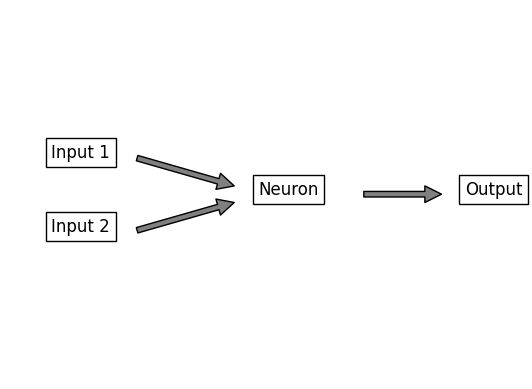

In [26]:
import matplotlib.pyplot as plt

# Visualizing a simple neuron structure
fig, ax = plt.subplots()

# Drawing the inputs, neuron, and output
ax.text(0.1, 0.6, "Input 1", fontsize=12, bbox=dict(facecolor='none', edgecolor='black'))
ax.text(0.1, 0.4, "Input 2", fontsize=12, bbox=dict(facecolor='none', edgecolor='black'))
ax.text(0.60, 0.5, "Neuron", fontsize=12, bbox=dict(facecolor='none', edgecolor='black'))
ax.text(1.1, 0.5, "Output", fontsize=12, bbox=dict(facecolor='none', edgecolor='black'))

# Drawing lines for inputs to neuron with arrows reversed
ax.annotate("", xy=(0.55, 0.52), xytext=(0.3, 0.6),
            arrowprops=dict(facecolor='gray', shrink=0.03))
ax.annotate("", xy=(0.55, 0.48), xytext=(0.3, 0.4),
            arrowprops=dict(facecolor='gray', shrink=0.03))

# Drawing line from neuron to output with arrow reversed
ax.annotate("", xy=(1.05, 0.5), xytext=(0.85, 0.5),
            arrowprops=dict(facecolor='gray', shrink=0.03))

# Set axis limits and hide the axes
ax.set_xlim(0, 1.2)
ax.set_ylim(0, 1)
ax.axis('off')

plt.show()

### Key Components:
- **Neurons (Nodes)**: Basic units that receive input, apply a mathematical function (activation), and pass on the output.
- **Weights**: Values that adjust the strength of connections between neurons.
- **Bias**: An additional parameter added to neurons to shift the activation function.
- **Activation Functions**: Functions that introduce non-linearity into the network, helping to model complex data.

---

## Layers of a Neural Network

1. **Input Layer**:
   - The layer where the data enters the network.
   - Each node represents a feature (e.g., pixel value, height, etc.).
  
2. **Hidden Layers**:
   - Layers between the input and output layers where computations are performed.
   - Each hidden layer node is connected to all nodes in the previous and next layers.

3. **Output Layer**:
   - The final layer where the network produces predictions or classifications.
   - The number of nodes corresponds to the number of classes or output values.

---

## How Neural Networks Work

### **Forward Propagation**:
Forward propagation is the process where input data passes through the network, from the input layer to the output layer. In each layer, a neuron calculates a **weighted sum** of the inputs, applies an **activation function**, and passes the result to the next layer.

### **Backpropagation**:
Backpropagation is the process of updating the weights and biases of the network based on the error between the predicted and actual values. This is done by calculating the gradient of the loss function and using an optimization algorithm like **Gradient Descent** to minimize the loss.

---

## Activation Functions

Activation functions introduce non-linearity into the network, allowing it to learn complex patterns.

1. **ReLU (Rectified Linear Unit)**:
   - Output: 0 if input < 0, otherwise the input.
   - Used in hidden layers.
   - Helps mitigate the vanishing gradient problem.

2. **Sigmoid**:
   - Maps any real-valued number to a value between 0 and 1.
   - Used for binary classification tasks.

3. **Softmax**:
   - Generalization of the sigmoid function for multi-class classification.
   - Produces probabilities for each class.

---

## Let’s Visualize a Simple Neural Network

We’ll use a small neural network to visualize how the inputs flow through the layers to produce an output. This network will take two inputs and produce one output.

### Step 1: Import Libraries

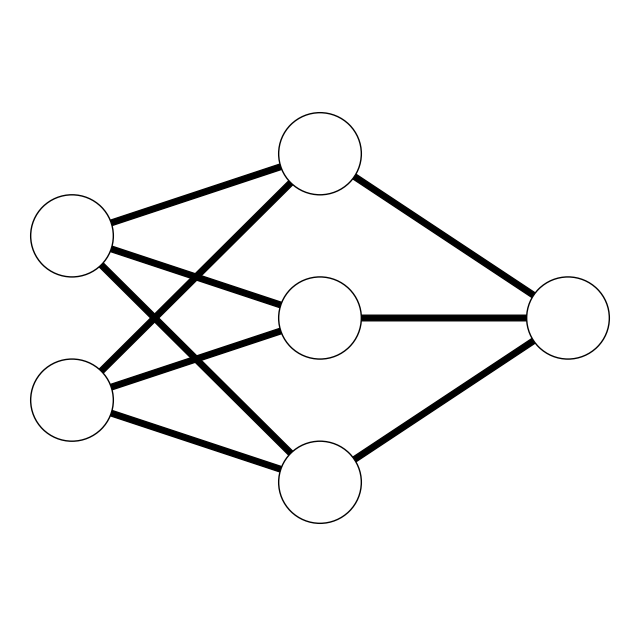

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Function to draw neurons and layers
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    ''' Draw a neural network diagram '''
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Nodes (neurons)
    for i, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size-1)/2. + (top + bottom)/2.
        for j in range(layer_size):
            circle = plt.Circle((left + i*h_spacing, layer_top - j*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)

    # Edges (connections)
    for i, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a-1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b-1)/2. + (top + bottom)/2.
        for j in range(layer_size_a):
            for k in range(layer_size_b):
                line = FancyArrowPatch((left + i*h_spacing, layer_top_a - j*v_spacing),
                                       (left + (i + 1)*h_spacing, layer_top_b - k*v_spacing),
                                       mutation_scale=20, color='k')
                ax.add_patch(line)

# Visualize the neural network
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [2, 3, 1])  # [2 inputs, 3 hidden, 1 output]
plt.show()

#### Explanation:

- This code visualizes a neural network with:
- 2 input neurons
- 1 hidden layer with 3 neurons
- 1 output neuron
- The arrows represent connections (weights) between neurons.

### Step 2: Build and Train a Simple Neural Network

We’ll build a simple neural network for binary classification (using the XOR problem) and visualize the outputs during training.

#### XOR Gate

An XOR (Exclusive OR) gate is a digital logic gate that outputs true or 1 only when the two binary inputs are **not equal**. If the inputs are the same, the output will be false or 0.

#### Mathematical Function
The XOR gate can be represented by the following Boolean algebra equation:
`Y = A ⊕ B`

Where:
- `Y` is the output
- `A` and `B` are the inputs
- The symbol `⊕` denotes the XOR operation.

## Truth Table

| A (Input 1) | B (Input 2) | Y (Output) |
|:-----------:|:-----------:|:----------:|
|      0      |      0      |      0     |
|      0      |      1      |      1     |
|      1      |      0      |      1     |
|      1      |      1      |      0     |

In this truth table:
- When both inputs are the same (either 0 or 1), the output is 0.
- When the inputs are different, the output is 1.

In [7]:
# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training data for XOR problem
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input for XOR
y = np.array([[0], [1], [1], [0]])  # Expected output for XOR

# Initialize weights and biases
np.random.seed(42)
weights_input_hidden = np.random.rand(2, 3)  # 2 input -> 3 hidden
weights_hidden_output = np.random.rand(3, 1)  # 3 hidden -> 1 output
bias_hidden = np.random.rand(1, 3)
bias_output = np.random.rand(1, 1)

learning_rate = 0.5

# Training loop
for epoch in range(10000):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    error = y - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate

# Final predictions after training
print("Predicted Output after 10,000 epochs:")
print(predicted_output)

Predicted Output after 10,000 epochs:
[[0.00683994]
 [0.97926028]
 [0.97915539]
 [0.0258563 ]]


#### Explanation:

- Forward Pass: Data passes through the input, hidden, and output layers.
- Backpropagation: The network learns by adjusting weights and biases to minimize errors.
- Final Output: The network predicts the XOR outputs (0 or 1).

### Step 3: Visualize Training Progress

We’ll visualize how the network learns over time by plotting the error during training.

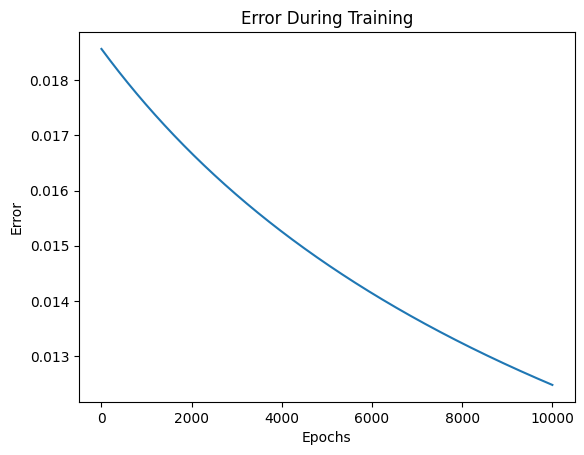

In [8]:
errors = []

for epoch in range(10000):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Compute error
    error = y - predicted_output
    errors.append(np.mean(np.abs(error)))

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate

# Plot error over time
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error During Training')
plt.show()

#### Conclusion:

- Visualization of the Network: We visualized a simple neural network with 2 inputs, 3 hidden neurons, and 1 output.
- Training: We trained the network on the XOR problem and saw the predictions converge over time.
- Error Reduction: We visualized how the error decreases as the network learns.


---